In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm 
from mpl_toolkits import mplot3d
import solvers

In [2]:
L=32
N = 1 ## number of particles
parameters = {'h':.25, 'Lx':L, 'Ly':L, 'Lz':L, 'N':N }

In [3]:
sim = solvers.Stokes3D(parameters)

For a very dilute system $\phi \ll 1$, the velocity of the particle should simple be:

$$
V_0 = \frac{F}{6\pi\eta a}
$$

In [4]:
a=2
sim.volFrac(a)

r = np.array((L/2, L/2, L/2))
F = np.array((0, 0, 1))
mu0 = 1/(6*np.pi*a)

sigma = a/(np.sqrt(3))
vx, vy, vz = sim.vCalc(a, sigma, r, F)  

print (sim.volFrac(a), vz/mu0)

0.0010226538585904274 0.8008965851968913


In [5]:
a = np.linspace(1,10,10)
cList = sim.volFrac(a)
vList = []
for i in range(len(a)):
    sigma =a[i]/ (np.sqrt(np.pi))
    mu0 = 1/(6*np.pi*a[i])
    vx, vy, vz = sim.vCalc(a[i], sigma, r, F)
    vList.append( vz/mu0 )

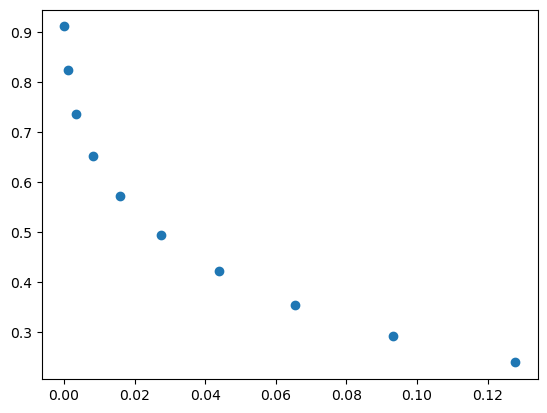

In [6]:
plt.plot(cList, vList, 'o')

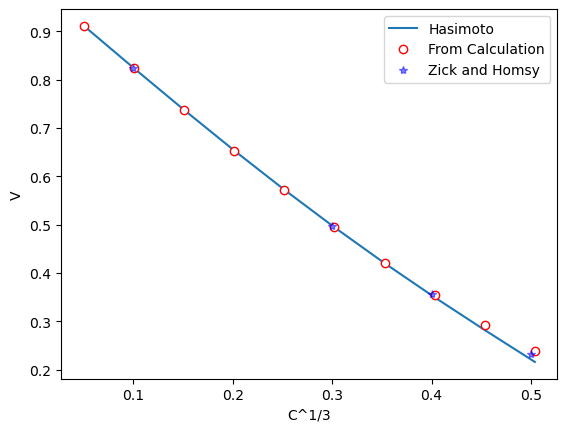

In [7]:
def analytical(c):
    return 1- 1.7601*np.power(c,1/3) + c - 1.5593*np.power(c,2)
analyticalVal = analytical(cList)
plt.plot(np.power(cList,1/3),analyticalVal, label = 'Hasimoto')
# plt.xlim((0,1))
plt.xlabel("C^1/3")
plt.ylabel("V")


phi = np.array([0.001, 0.027, 0.064,.125])#,.216,.343])
exR = [.825, .498, .356, .233]#, .134, .065]
plt.plot(np.power(cList,1/3), vList, 'o', mec='red', mfc='White', label = 'From Calculation' )
plt.plot(phi**(1/3), exR, '*',  lw =4, color="blue", label='Zick and Homsy', alpha=0.5)


plt.legend()